# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


# Data Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.sample(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5830,41,16-03-2012,1201511.62,0,47.76,3.486,197.045721,6.589
4420,31,03-08-2012,1390174.63,0,91.57,3.417,221.586980,6.565


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

* the data has no duplicates or missing values.

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


* weekly_sales column has outliers<br>
* Temperature column has some negative values<br>
* CPI column has outliers

# Feature Engineering

In [ ]:
def get_season(month):
    '''this function is to get season according to month column'''
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

* Now let's create new features Month, Year and Season from Date column.


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Season'] = df['Month'].apply(get_season)

In [ ]:
df.sample(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Season
3380,24,2011-11-04,1385860.38,0,39.87,3.738,136.475129,8.454,11,2011,Autumn
4824,34,2012-02-10,1047658.09,1,36.70,3.411,130.384903,9.653,2,2012,Winter
3787,27,2011-06-03,2053708.01,0,74.17,4.069,138.769461,7.725,6,2011,Summer


# Exploratory Data Analysis

<h2>1. Univariate Analysis

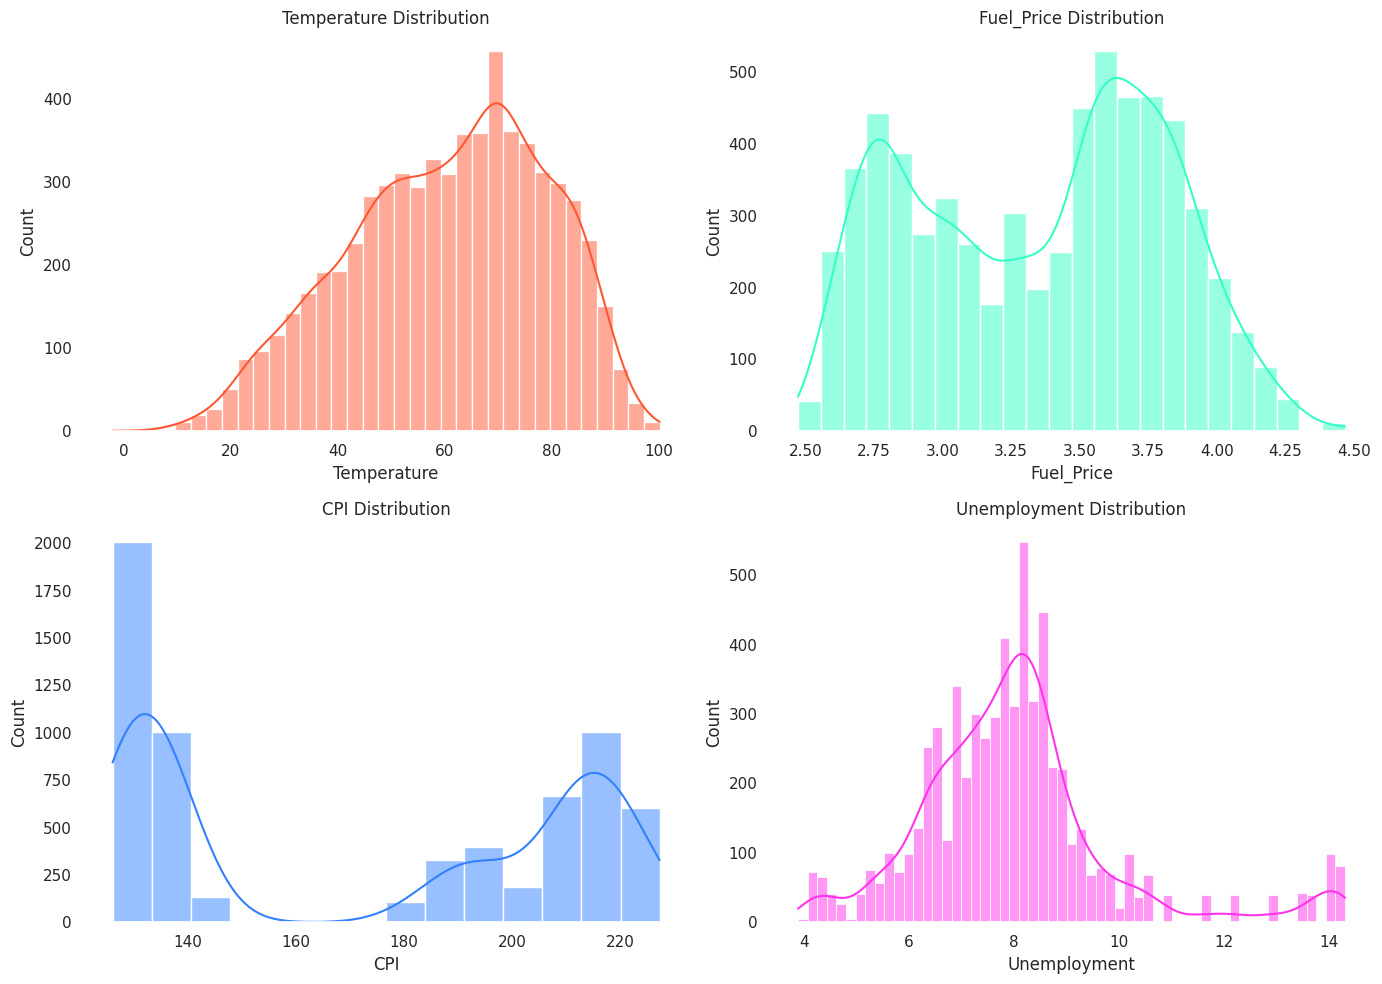

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 subplot
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Define the columns for which histograms will be plotted
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Define vibrant colors for the histograms
colors = ['#FF5733', '#33FFC7', '#3380FF', '#FF33EB']

# Loop through each column and plot a histogram in the corresponding subplot
for i, col in enumerate(cols):
    # Determine the row and column indices for subplot placement
    row = i // 2
    col = i % 2

    # Plot the histogram
    sns.histplot(df,
                 x=cols[i],
                 ax=ax[row, col],
                 kde=True,
                 color=colors[i]
                 )

    # Set title for the subplot
    ax[row, col].set_title(f'{cols[i]} Distribution')

    # Set face color for each subplot
    ax[row, col].set_facecolor('white')

# Set face color of the entire figure to white
fig.patch.set_facecolor('white')

# Adjust layout to prevent overlap
plt.tight_layout()

#Enable grid lines
ax[row, col].grid(True)

# Display the plot
plt.show()


* CPI and Fuel_Price have bimodal distribution.
* Temperature and Unemployment have normal distribution.

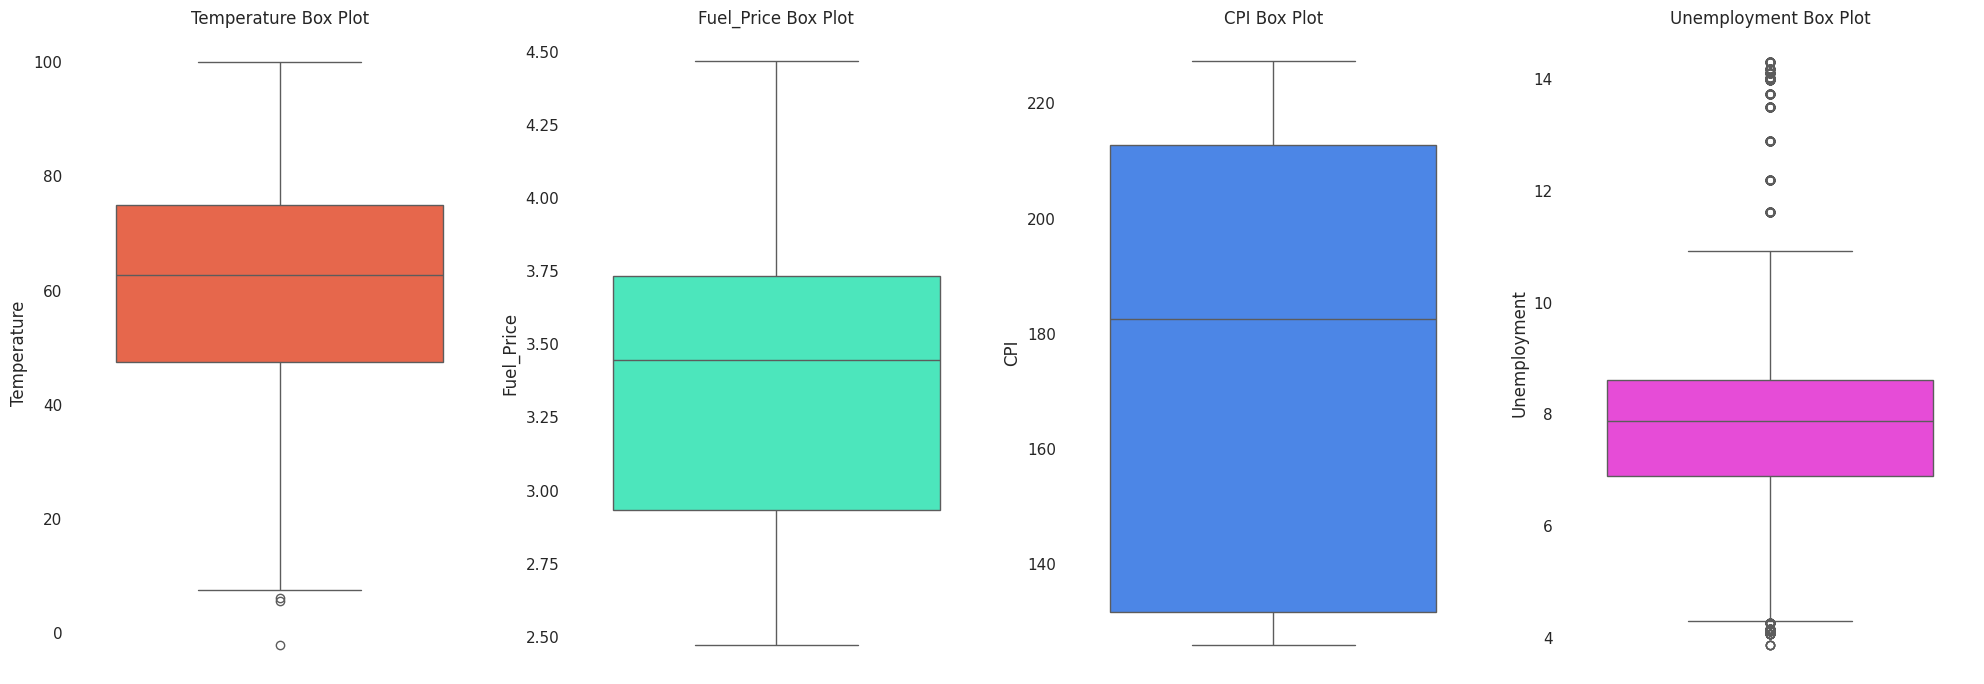

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which box plots will be plotted
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Define vibrant colors for the box plots
colors = ['#FF5733', '#33FFC7', '#3380FF', '#FF33EB']

# Create a 1x4 subplot grid
fig, axes = plt.subplots(1, 4, figsize=(20, 7))

# Loop through each column and create a box plot in the corresponding subplot
for i, col in enumerate(cols):
    # Plot the box plot for the current column
    sns.boxplot(df[col], ax=axes[i], color=colors[i])

    # Set title
    axes[i].set_title(f'{col} Box Plot')

    # Set background color
    axes[i].set_facecolor('white')

    # Hide the axes
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


* Unemployment column has outliers that need to be handled.
* weekly_sales column has outliers
* Temperature column has some negative values

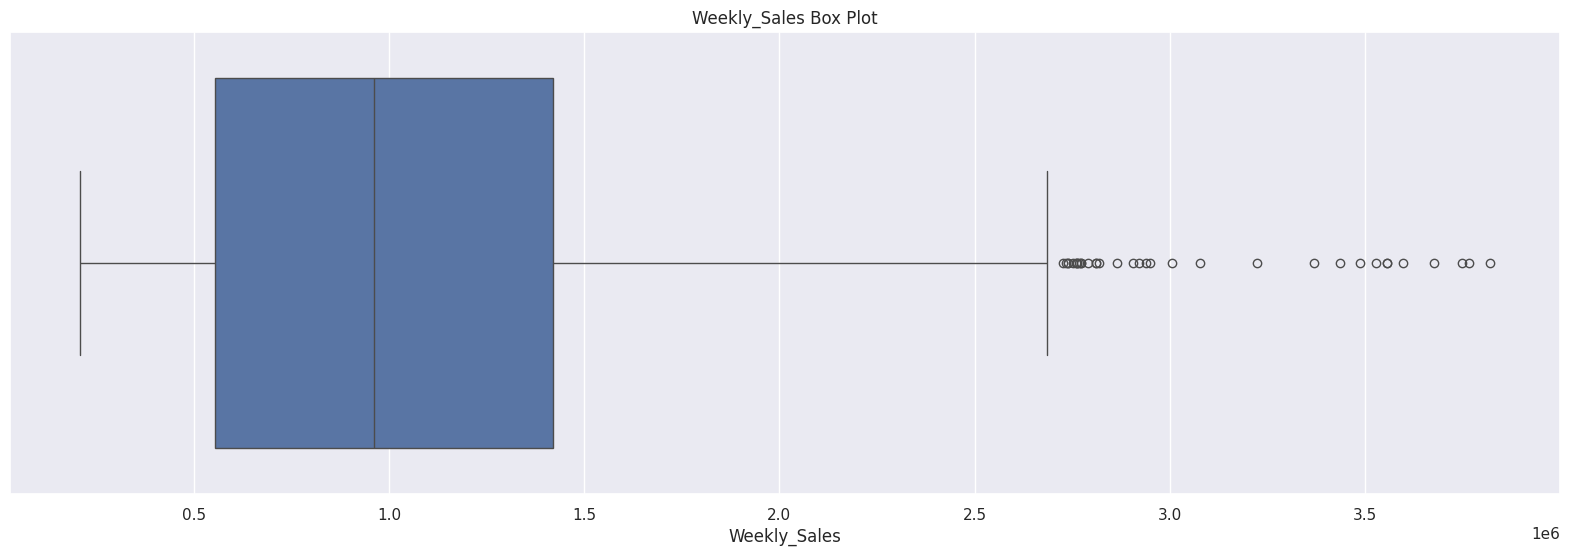

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['Weekly_Sales']);
plt.title('Weekly_Sales Box Plot');

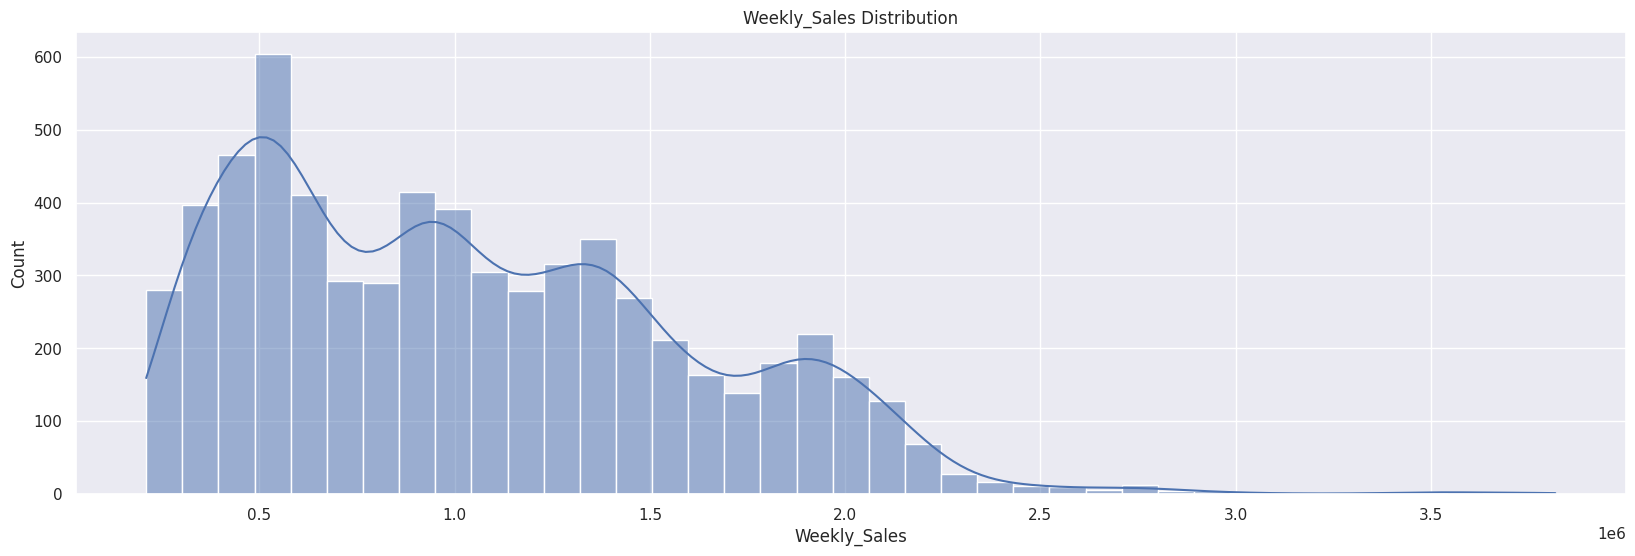

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(x=df['Weekly_Sales'],kde=True);
plt.title('Weekly_Sales Distribution');

* Weekly_Sales distribution is right skewed as it has some outliers.

<h2>2. Bivariate Analysis

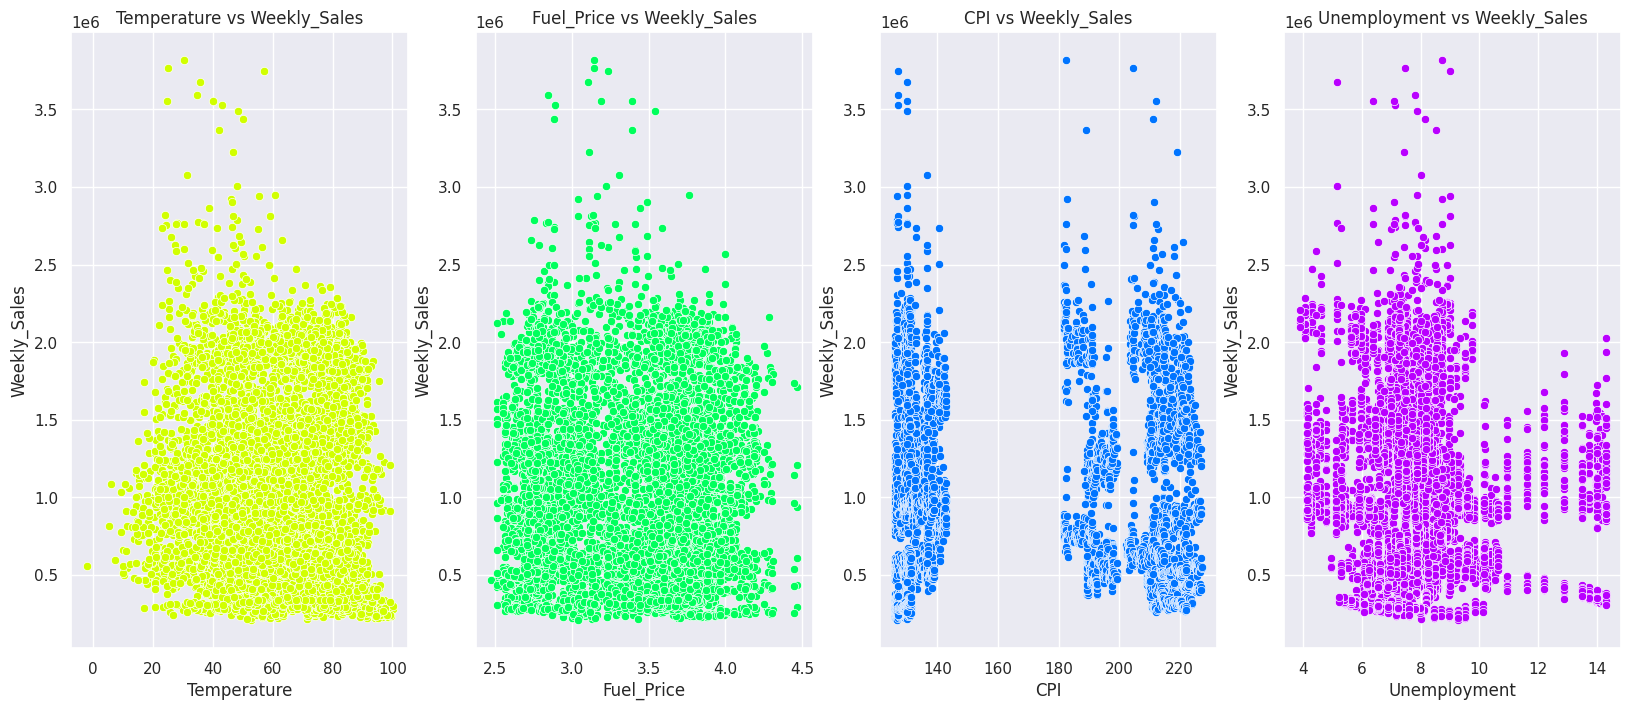

In [ ]:
# Define the color palette
palette = sns.color_palette("hsv", len(cols))

# Create a figure and subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

# Define the columns
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Iterate over columns and create scatter plots
for i, col in enumerate(cols):
    sns.scatterplot(data=df, y='Weekly_Sales', x=col, ax=ax[i], color=palette[i])
    ax[i].set_title(f'{col} vs Weekly_Sales')

# Show the plot
plt.show()


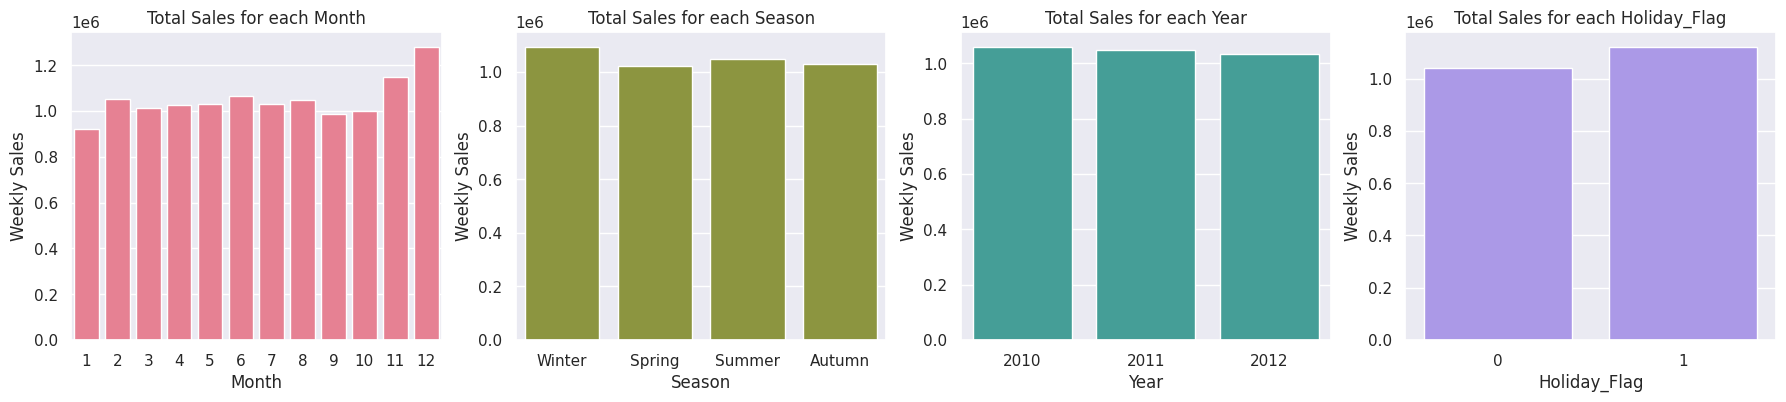

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = sns.color_palette("husl", len(cols))

# Create a figure and subplots
fig, ax = plt.subplots(1, 4, figsize=(22, 4))

# Define the columns
cols = ['Month', 'Season', 'Year', 'Holiday_Flag']

# Iterate over columns and create bar plots
for i, col in enumerate(cols):
    sns.barplot(data=df, x=col, y='Weekly_Sales', ax=ax[i], color=palette[i], ci=None)
    ax[i].set_title(f'Total Sales for each {col}')
    ax[i].set_ylabel('Weekly Sales')  # Add y-label if needed

# Show the plot
plt.show()



* Sales tend to be higher in winter and holidays.
* Sales are higher in Months 11 ,12.

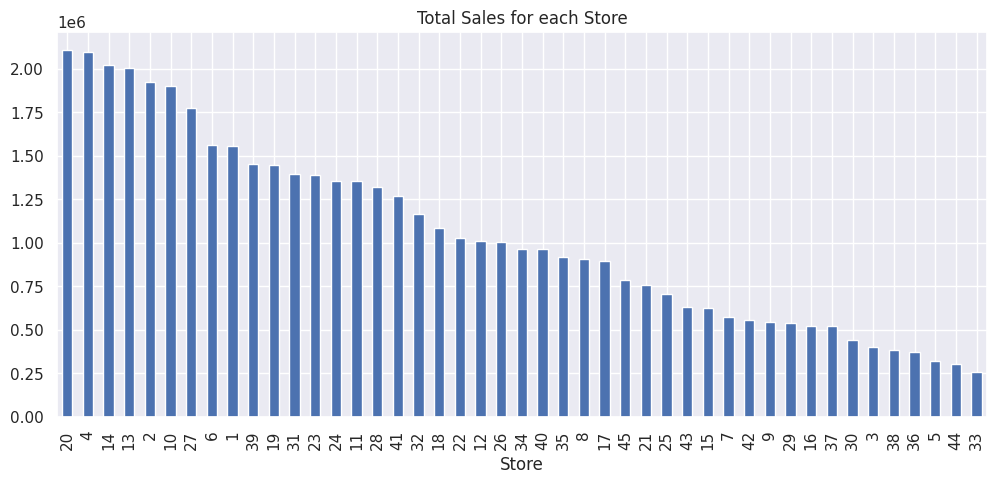

In [ ]:
plt.figure(figsize=(12,5))
df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Total Sales for each Store');

**This is the most important step to achieve the highest accuracy as we can't treat Store as numerical feature so we should transform it to categorical one first before modeling.**

In [ ]:
df['Store'] = df['Store'].astype('object')

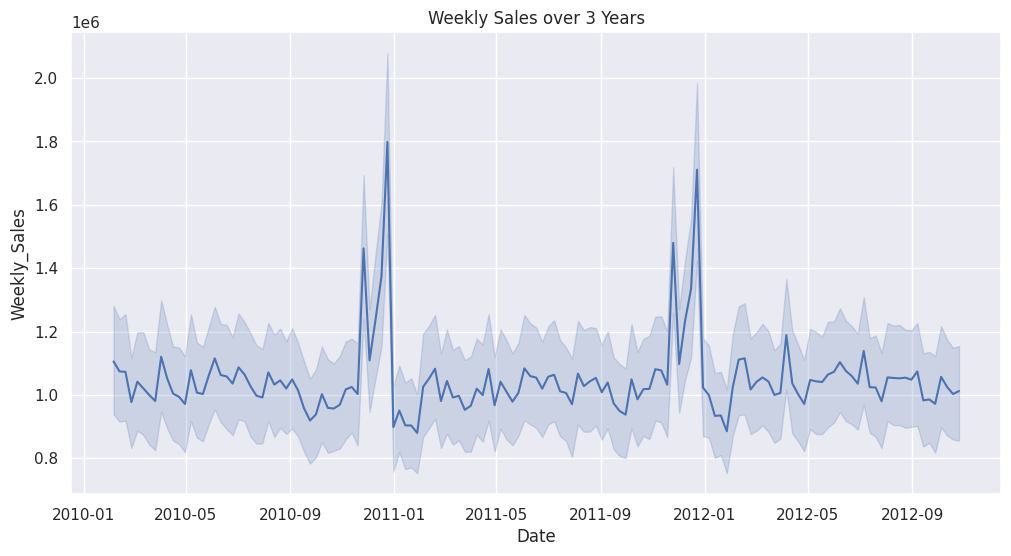

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["Date"],y=df['Weekly_Sales']);
plt.title('Weekly Sales over 3 Years');

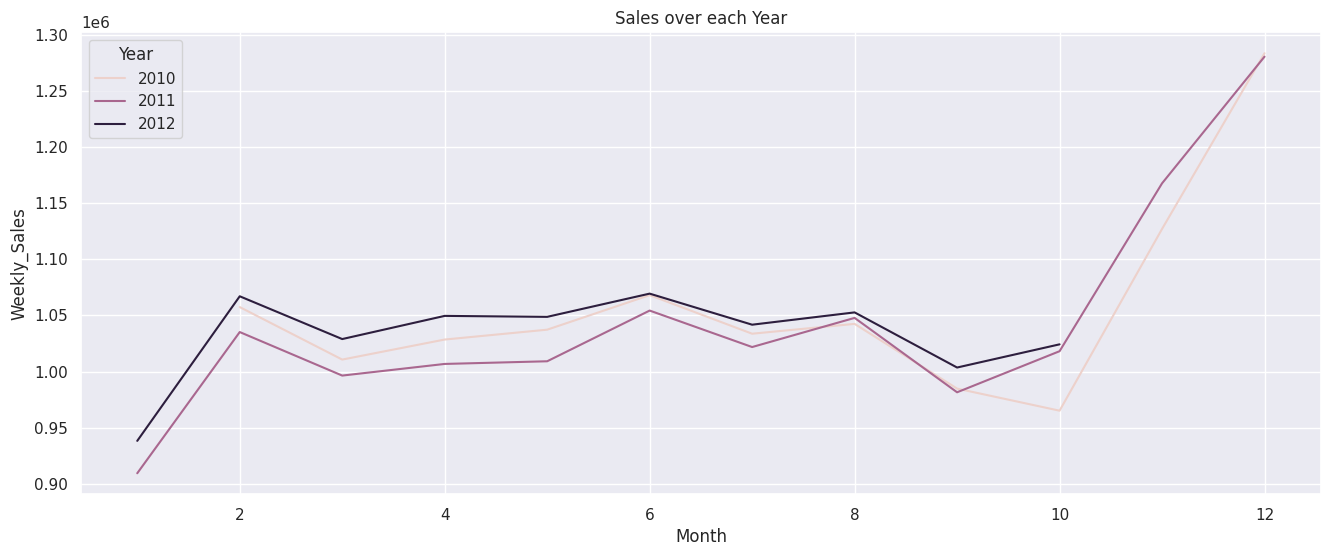

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x=df["Month"],y=df['Weekly_Sales'],hue=df['Year'],ci=None);
plt.title('Sales over each Year');

* as we mentioned before ,Sales are higher in Months 11 ,12.

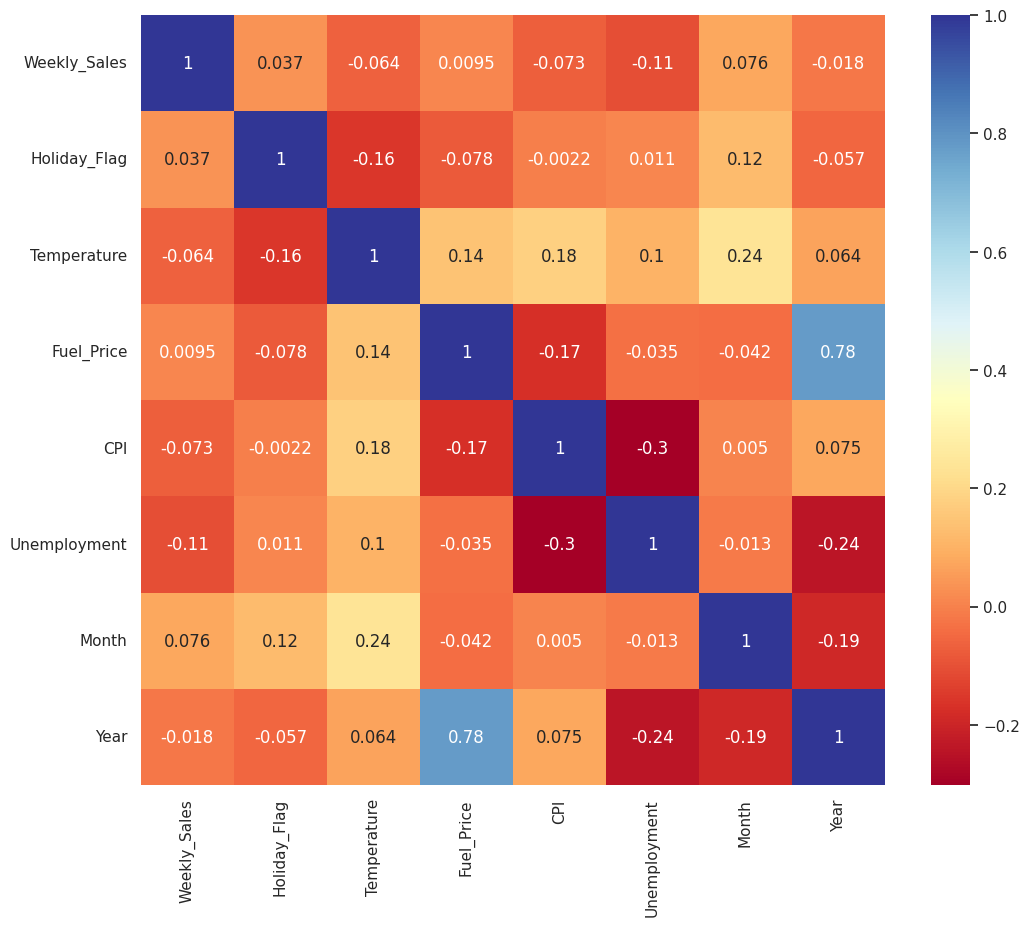

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),cmap='RdYlBu',annot=True);

<h2> Removing Outliers

In [ ]:
num_features = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

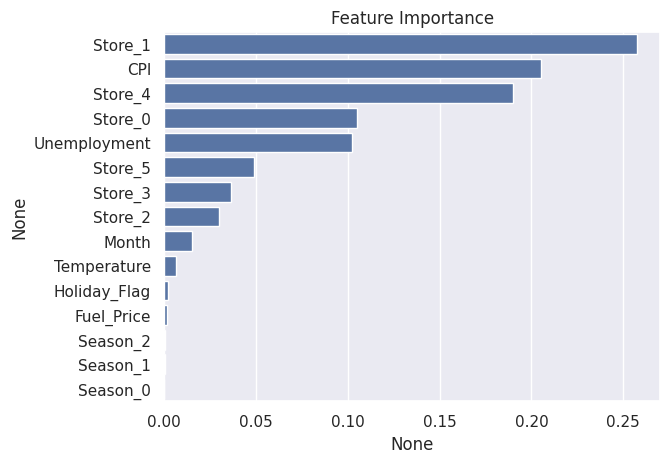

In [ ]:
feat_imp = pd.Series(dec_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance');

# Bulding model and uisng Gridsearchcv for hyperparameter tuning

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def tune_and_evaluate(model, param_grid):
    '''This function receives a model then tunes it using GridSearch
    then prints the best parameters, error metrics, and returns the best estimator'''

    # Tuning the model
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ", best_params)
    print('Mean cross-validated score of the best_estimator is: ', best_score)
    print('-------------------------------------------------------------------')

    # Best estimator evaluation
    train_pred = best_estimator.predict(X_train)
    test_pred = best_estimator.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print("Training set MAE:", round(train_mae, 3))
    print("Test set MAE:", round(test_mae, 3))
    print("Training set MSE:", round(train_mse, 3))
    print("Test set MSE:", round(test_mse, 3))
    print("Training set RMSE:", round(train_rmse, 3))
    print("Test set RMSE:", round(test_rmse, 3))
    print("Training set R2 Score:", round(train_r2, 3))
    print("Test set R2 Score:", round(test_r2, 3))

    return best_estimator


# Defining the models without hypertuning parameters

In [ ]:
from sklearn.model_selection import cross_val_score
def without_hypertuning(model):
    '''This function receives a model, evaluates it, and returns the model'''

    # Model fitting
    model.fit(X_train, y_train)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", np.mean(cv_scores))
    print('-------------------------------------------------------------------')

    # Best estimator evaluation
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print("Training set MAE:", round(train_mae, 3))
    print("Test set MAE:", round(test_mae, 3))
    print("Training set MSE:", round(train_mse, 3))
    print("Test set MSE:", round(test_mse, 3))
    print("Training set RMSE:", round(train_rmse, 3))
    print("Test set RMSE:", round(test_rmse, 3))
    print("Training set R2 Score:", round(train_r2, 3))
    print("Test set R2 Score:", round(test_r2, 3))

    return model


<h2> Data Splitting and Encoding categorical features

In [ ]:
num_vars = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']

# scaling numerical variables
sc = StandardScaler()
df[num_vars] = sc.fit_transform(df[num_vars])

# encoding categorical features
encoder = BinaryEncoder(cols=['Store','Season'])
df = encoder.fit_transform(df)

In [ ]:
features = df.columns.drop(['Weekly_Sales','Date','Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

# 1(a).Linear regression model before hypertuning

In [ ]:
linear_regression_model = LinearRegression()

# Step 4: Call the tune_and_evaluate function with the Linear Regression model
without_hypertuning(linear_regression_model)

Cross-Validation Scores: [0.21083035 0.20024257 0.17173954 0.20475757 0.16115932 0.19986323
 0.16242748 0.2227609  0.19219908 0.21002587]
Mean Cross-Validation Score: 0.1936005908214363
-------------------------------------------------------------------
Training set MAE: 0.742
Test set MAE: 0.737
Training set MSE: 0.798
Test set MSE: 0.772
Training set RMSE: 0.893
Test set RMSE: 0.879
Training set R2 Score: 0.2
Test set R2 Score: 0.237


LinearRegression()

# 1(b). Linear Regression after hypertuning

In [ ]:
# building the model
lin_reg = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
)

# hyperparameter tunning
param_grid = {'polynomialfeatures__degree':[2,3,4]}
lin_reg = tune_and_evaluate(lin_reg,param_grid)

Best parameters are:  {'polynomialfeatures__degree': 3}
Mean cross-validated score of the best_estimator is:  0.9648151035508485
-------------------------------------------------------------------
Training set MAE: 0.099
Test set MAE: 0.122
Training set MSE: 0.023
Test set MSE: 0.041
Training set RMSE: 0.151
Test set RMSE: 0.201
Training set R2 Score: 0.977
Test set R2 Score: 0.959


# 2(a).Knn model with out hypertuining

In [ ]:
knn_model = KNeighborsRegressor()

# Step 4: Call the tune_and_evaluate function with the Linear Regression model
without_hypertuning(knn_model)

Cross-Validation Scores: [0.81725208 0.83807196 0.83881178 0.81007932 0.81206317 0.82690476
 0.77966241 0.83609056 0.80354878 0.85293604]
Mean Cross-Validation Score: 0.8215420847034032
-------------------------------------------------------------------
Training set MAE: 0.174
Test set MAE: 0.243
Training set MSE: 0.089
Test set MSE: 0.159
Training set RMSE: 0.298
Test set RMSE: 0.398
Training set R2 Score: 0.911
Test set R2 Score: 0.84


KNeighborsRegressor()

## 2(b). KNNRegressor with hypertuning

In [ ]:
# building the model
knn = KNeighborsRegressor()

# hyperparameter tunning
param_grid = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = tune_and_evaluate(knn,param_grid)

Best parameters are:  {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Mean cross-validated score of the best_estimator is:  0.915011771441202
-------------------------------------------------------------------
Training set MAE: 0.0
Test set MAE: 0.149
Training set MSE: 0.0
Test set MSE: 0.083
Training set RMSE: 0.0
Test set RMSE: 0.288
Training set R2 Score: 1.0
Test set R2 Score: 0.916


# 3(a).DecisionTreeRegressor without hypertuning

In [ ]:
decision_tree_model = DecisionTreeRegressor()

# Step 4: Call the tune_and_evaluate function with the Linear Regression model
without_hypertuning(decision_tree_model)

Cross-Validation Scores: [0.93015856 0.93043484 0.91417558 0.94986447 0.94089606 0.91444414
 0.93973258 0.94949289 0.91616171 0.89911099]
Mean Cross-Validation Score: 0.9284471809697923
-------------------------------------------------------------------
Training set MAE: 0.0
Test set MAE: 0.145
Training set MSE: 0.0
Test set MSE: 0.07
Training set RMSE: 0.0
Test set RMSE: 0.264
Training set R2 Score: 1.0
Test set R2 Score: 0.93


DecisionTreeRegressor()

# 3(b). Decision Tree with hypertuning

In [ ]:
# building the model
dec_tree = DecisionTreeRegressor()

# hyperparameter tunning
param_grid = {'max_depth': np.arange(2,13)}
dec_tree = tune_and_evaluate(dec_tree,param_grid)

Best parameters are:  {'max_depth': 9}
Mean cross-validated score of the best_estimator is:  0.9365409744335041
-------------------------------------------------------------------
Training set MAE: 0.098
Test set MAE: 0.141
Training set MSE: 0.027
Test set MSE: 0.065
Training set RMSE: 0.165
Test set RMSE: 0.255
Training set R2 Score: 0.973
Test set R2 Score: 0.934


# 4(a). Random Forest without hypertuning

In [ ]:
randomforest_model = RandomForestRegressor(n_jobs=-1)

# Step 4: Call the tune_and_evaluate function with the Linear Regression model
without_hypertuning(randomforest_model)

Cross-Validation Scores: [0.95173735 0.96696104 0.95186641 0.9582701  0.97195793 0.95600491
 0.96356386 0.9567281  0.9406002  0.93279767]
Mean Cross-Validation Score: 0.9550487572226898
-------------------------------------------------------------------
Training set MAE: 0.043
Test set MAE: 0.117
Training set MSE: 0.006
Test set MSE: 0.043
Training set RMSE: 0.08
Test set RMSE: 0.207
Training set R2 Score: 0.994
Test set R2 Score: 0.957


RandomForestRegressor(n_jobs=-1)

# 4(b). Random Forest after hypertuning

In [ ]:
# building the model
random_forest = RandomForestRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,15),
    'n_estimators': np.arange(25,101,25)
}
random_forest = tune_and_evaluate(random_forest,param_grid)

Best parameters are:  {'max_depth': 13, 'n_estimators': 100}
Mean cross-validated score of the best_estimator is:  0.9558200411106172
-------------------------------------------------------------------
Training set MAE: 0.057
Test set MAE: 0.118
Training set MSE: 0.009
Test set MSE: 0.044
Training set RMSE: 0.094
Test set RMSE: 0.209
Training set R2 Score: 0.991
Test set R2 Score: 0.956


# 5(a). Xgboot model without hypertuning

In [ ]:
Xgboost_model = XGBRegressor(n_jobs=-1)

# Step 4: Call the tune_and_evaluate function with the Linear Regression model
without_hypertuning(Xgboost_model)

Cross-Validation Scores: [0.96260012 0.9700785  0.95760378 0.97585777 0.97196387 0.97302113
 0.97635505 0.96686309 0.96600326 0.95874847]
Mean Cross-Validation Score: 0.9679095034285694
-------------------------------------------------------------------
Training set MAE: 0.05
Test set MAE: 0.113
Training set MSE: 0.005
Test set MSE: 0.033
Training set RMSE: 0.072
Test set RMSE: 0.182
Training set R2 Score: 0.995
Test set R2 Score: 0.967


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

# 5(b). XGBoost after hypertuning

In [ ]:
# building the model
xgb = XGBRegressor(n_jobs=-1)

# hyperparameter tunning
param_grid = {
    'max_depth': np.arange(2,10),
    'n_estimators': np.arange(20,201,20)
}
xgb = tune_and_evaluate(xgb,param_grid)

Best parameters are:  {'max_depth': 7, 'n_estimators': 200}
Mean cross-validated score of the best_estimator is:  0.9697741839595126
-------------------------------------------------------------------
Training set MAE: 0.015
Test set MAE: 0.104
Training set MSE: 0.0
Test set MSE: 0.032
Training set RMSE: 0.021
Test set RMSE: 0.178
Training set R2 Score: 1.0
Test set R2 Score: 0.968


* The best performing model is XGBoost with an accuracy of 96%

## Error Metrics comparison report

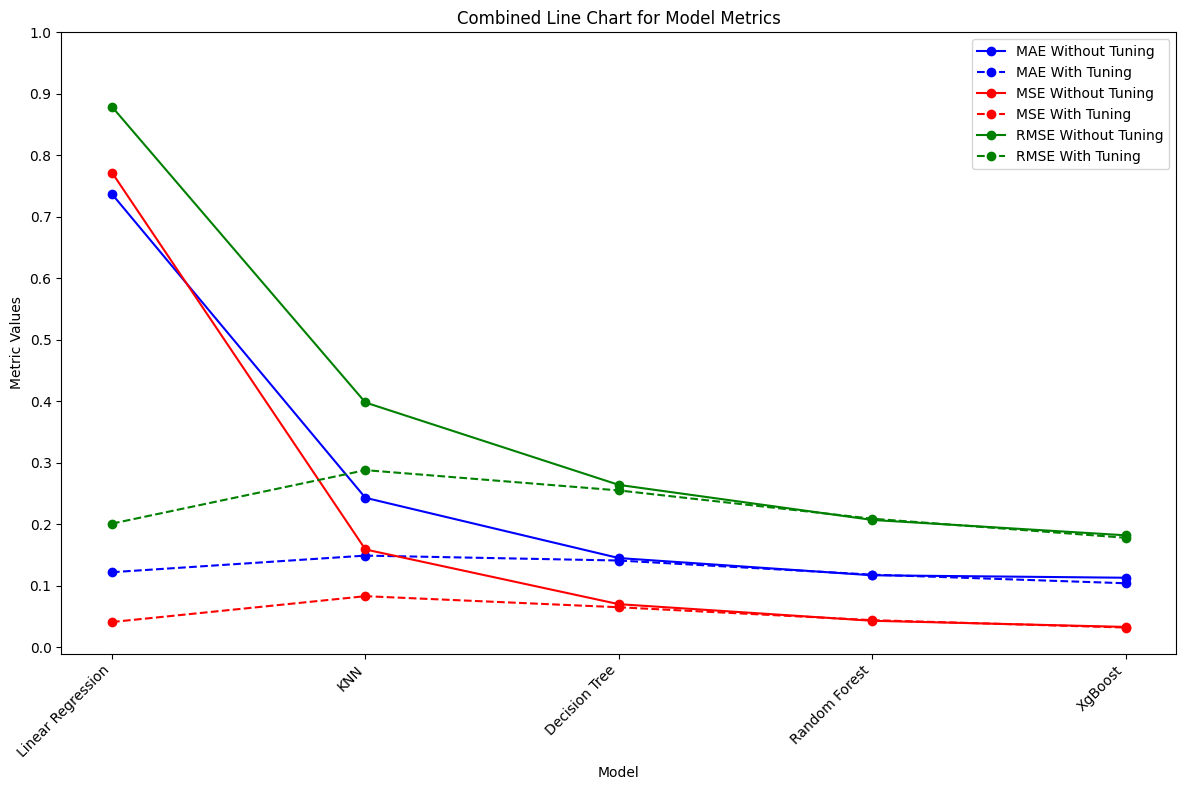

In [ ]:
import matplotlib.pyplot as plt

# Model names and performance metrics data
models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XgBoost']
mae_without_tuning = [0.737, 0.243, 0.145, 0.117, 0.113]
mse_without_tuning = [0.772, 0.159, 0.070, 0.043, 0.033]
rmse_without_tuning = [0.879, 0.398, 0.264, 0.207, 0.182]
mae_with_tuning = [0.122, 0.149, 0.141, 0.118, 0.104]
mse_with_tuning = [0.041, 0.083, 0.065, 0.044, 0.032]
rmse_with_tuning = [0.201, 0.288, 0.255, 0.209, 0.178]

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

# Plotting each metric with and without tuning
plt.plot(models, mae_without_tuning, 'b-o', label='MAE Without Tuning')
plt.plot(models, mae_with_tuning, 'b--o', label='MAE With Tuning')
plt.plot(models, mse_without_tuning, 'r-o', label='MSE Without Tuning')
plt.plot(models, mse_with_tuning, 'r--o', label='MSE With Tuning')
plt.plot(models, rmse_without_tuning, 'g-o', label='RMSE Without Tuning')
plt.plot(models, rmse_with_tuning, 'g--o', label='RMSE With Tuning')

# Adding titles and labels
plt.title('Combined Line Chart for Model Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Values')
plt.xticks(models, rotation=45, ha='right')  # Ensure all models are labeled and rotate for better visibility
plt.yticks([i/10 for i in range(0, 11)])  # Custom y ticks from 0 to 1 with step 0.1

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Model evaluation comparison report

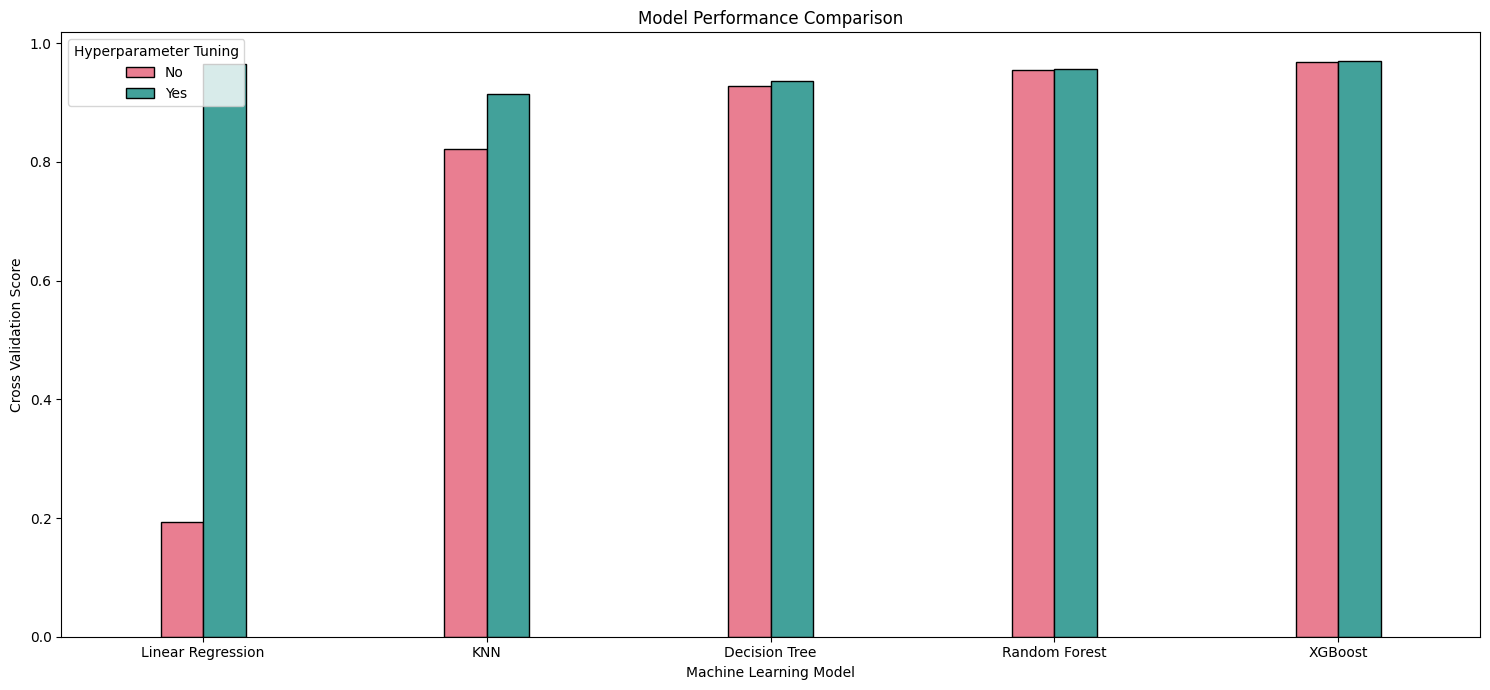

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example DataFrame with model performance metrics
data = {
    'Model': ['Linear Regression', 'Linear Regression', 'KNN', 'KNN', 'Decision Tree', 'Decision Tree',
              'Random Forest', 'Random Forest', 'XGBoost', 'XGBoost'],
    'Hyperparameter Tuning': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Cross Validation Score': [0.1936005908214363, 0.96481, 0.8219, 0.9150, 0.9284, 0.9365, 0.9550, 0.95582, 0.9679, 0.9697]
}

df = pd.DataFrame(data)

# Set a different color palette
colors = sns.color_palette("husl", 2)

# Set the desired bar width
bar_width = 0.3

# Plotting
plt.figure(figsize=(15, 7))

# Plot the bars with adjusted bar width
sns.barplot(x='Model', y='Cross Validation Score', hue='Hyperparameter Tuning', data=df, palette=colors,
            linewidth=1, edgecolor='k', saturation=0.8, ci=None, capsize=0.1, errwidth=1, dodge=True,
            width=bar_width)

# Add labels and title
plt.title('Model Performance Comparison')
plt.xlabel('Machine Learning Model')
plt.ylabel('Cross Validation Score')

# Adjusting legend position
plt.legend(title='Hyperparameter Tuning', loc='upper left')

# Add legend inside the plot area
plt.tight_layout()

plt.show()
